## File information

File: Assignment_6.2b.ipynb

Name: Amie Davis

Date: 1/14/2021

Course: DSC650 - Big Data

Assignment Number: 6.2b

Purpose: Create a ConvNet model that classifies images from the Keras CIFAR10 small images classification dataset, include dropout and data augmentation


# Train the convnet on CIFAR10 small images
## This file contains code from Deep Learning with Python

www.manning.com/books/deep-learning-with-python

Copyright 2018 Francois Chollet

## Data Source: The CIFAR10 dataset - comes packaged with Keras. 
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

### References: https://keras.io/api/preprocessing/image/#imagedatagenerator-class

In [1]:
# Import required packages
import keras

from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

import matplotlib.pyplot as plt

import os
from pathlib import Path

In [2]:
# Set results directory for writing
import os

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

model_path = results_dir.joinpath('6.2b_model.h5')
output_path = results_dir.joinpath('6.2b_output.txt')
image1_path = results_dir.joinpath('6.2b_image1.png')
image2_path = results_dir.joinpath('6.2b_image2.png')

## Build Convolutional Neural Network Model

In [3]:
# Instantiate ConvNet
model = models.Sequential()

# Build ConvNet
# Stack of Conv2D and MaxPooling2D layers
# Input shape is height x width x channel
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [4]:
# Show layer details
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
____________________________________________________

In [5]:
# Last output is of shape (2, 2, 128)
# Flatten 3D output to 1D
model.add(layers.Flatten())

# Add dropout layer
# Randomly sets input units to 0 to help prevent overfitting
# Rate = 0.2 drops 20% of the units
#model.add(layers.Dropout(0.2))

# Add densely-connected classifier network
# Final output has 10 classifications
# Use softmax activation fxn since multi-classification problem
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Show layer details
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [7]:
# Output model summary to file
with open(output_path, 'w') as f:
    f.write('Model Summary:')
    f.write('\n')
    
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: f.write(x + '\n'))

## Load the data

In [8]:
# Load data
# cifar10 data is in the shape (num_samples, height, width, channel) so no need to reshape
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Prepare training data
# Normalize to values btwn 0 and 1 since pizel range from 0-255
train_images = train_images.astype('float32') / 255

# Prepare test data
# Normalize to values btwn 0 and 1 since pizel range from 0-255
test_images = test_images.astype('float32') / 255

# Convert labels from integer to categorical
# cifar10 labels are in the shape (num_samples, 1)
# Transform label indices to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Data Augmentation

In [9]:
# Setup Data Augmentation generator
# Views images different ways to increase dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Validation data should not be augmented - only training
test_datagen = ImageDataGenerator(rescale=1./255)

# Generates batches of augmentated data
# Uses flow method since data & labels in arrays
train_generator = train_datagen.flow(
        train_images,
        train_labels,
        batch_size=64,
        shuffle=True)

validation_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=20,
        shuffle=True)

In [15]:
# Train ConvNet on the CIFAR10 images
# Use categorical_crossentropy since multi-classification
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model using generator
# Collect measurement logs
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=200,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/200
200/200 [==============================] - 9s 47ms/step - loss: 1.6822 - accuracy: 0.3889 - val_loss: 1.4695 - val_accuracy: 0.4800
Epoch 2/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6614 - accuracy: 0.4039 - val_loss: 1.4682 - val_accuracy: 0.4800
Epoch 3/200
200/200 [==============================] - 9s 45ms/step - loss: 1.6574 - accuracy: 0.4120 - val_loss: 1.4597 - val_accuracy: 0.4820
Epoch 4/200
200/200 [==============================] - 9s 45ms/step - loss: 1.6470 - accuracy: 0.4063 - val_loss: 1.4448 - val_accuracy: 0.4790
Epoch 5/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6487 - accuracy: 0.4070 - val_loss: 1.4605 - val_accuracy: 0.4680
Epoch 6/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6486 - accuracy: 0.4087 - val_loss: 1.4616 - val_accuracy: 0.4690
Epoch 7/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6568 - accuracy: 0.4075 - val_loss: 1.4327 - val_accuracy:

200/200 [==============================] - 9s 46ms/step - loss: 1.6097 - accuracy: 0.4235 - val_loss: 1.4712 - val_accuracy: 0.4850
Epoch 58/200
200/200 [==============================] - 9s 45ms/step - loss: 1.6226 - accuracy: 0.4146 - val_loss: 1.3858 - val_accuracy: 0.5170
Epoch 59/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6206 - accuracy: 0.4150 - val_loss: 1.4727 - val_accuracy: 0.4910
Epoch 60/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6165 - accuracy: 0.4206 - val_loss: 1.4731 - val_accuracy: 0.4900
Epoch 61/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6143 - accuracy: 0.4205 - val_loss: 1.3876 - val_accuracy: 0.5170
Epoch 62/200
200/200 [==============================] - 9s 45ms/step - loss: 1.6205 - accuracy: 0.4187 - val_loss: 1.4379 - val_accuracy: 0.4760
Epoch 63/200
200/200 [==============================] - 9s 46ms/step - loss: 1.6049 - accuracy: 0.4208 - val_loss: 1.4437 - val_accuracy: 0.473

200/200 [==============================] - 9s 45ms/step - loss: 1.5837 - accuracy: 0.4289 - val_loss: 1.4716 - val_accuracy: 0.5030
Epoch 114/200
200/200 [==============================] - 9s 45ms/step - loss: 1.5855 - accuracy: 0.4288 - val_loss: 1.4158 - val_accuracy: 0.4920
Epoch 115/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5898 - accuracy: 0.4323 - val_loss: 1.3459 - val_accuracy: 0.5290
Epoch 116/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5761 - accuracy: 0.4402 - val_loss: 1.3882 - val_accuracy: 0.5050
Epoch 117/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5808 - accuracy: 0.4392 - val_loss: 1.4156 - val_accuracy: 0.4870
Epoch 118/200
200/200 [==============================] - 9s 45ms/step - loss: 1.5768 - accuracy: 0.4323 - val_loss: 1.4704 - val_accuracy: 0.4800
Epoch 119/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5769 - accuracy: 0.4348 - val_loss: 1.4076 - val_accuracy:

200/200 [==============================] - 9s 45ms/step - loss: 1.5641 - accuracy: 0.4428 - val_loss: 1.4127 - val_accuracy: 0.5050
Epoch 170/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5580 - accuracy: 0.4435 - val_loss: 1.4196 - val_accuracy: 0.4810
Epoch 171/200
200/200 [==============================] - 9s 45ms/step - loss: 1.5423 - accuracy: 0.4514 - val_loss: 1.3477 - val_accuracy: 0.5300
Epoch 172/200
200/200 [==============================] - 9s 47ms/step - loss: 1.5535 - accuracy: 0.4465 - val_loss: 1.3132 - val_accuracy: 0.5190
Epoch 173/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5507 - accuracy: 0.4486 - val_loss: 1.4145 - val_accuracy: 0.4880
Epoch 174/200
200/200 [==============================] - 9s 45ms/step - loss: 1.5648 - accuracy: 0.4426 - val_loss: 1.3202 - val_accuracy: 0.5410
Epoch 175/200
200/200 [==============================] - 9s 46ms/step - loss: 1.5561 - accuracy: 0.4461 - val_loss: 1.4079 - val_accuracy:

In [16]:
# Save Model
model.save(model_path)

In [17]:
# Write history dictionary to file
import json

with open(output_path, 'a') as file:
    file.write('Final epoch metrics for original trained model:')
    json.dump(str(history.history), file)

## Validate Model

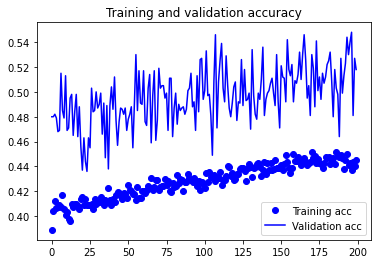

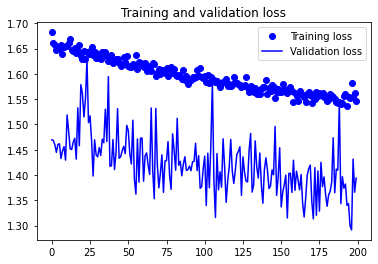

In [18]:
# Plot the training and validation loss 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Save figure1 to drive
plt.savefig(image1_path)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
   
# Save figure2 to drive
plt.savefig(image2_path)

plt.show()

Although the accuracy is pretty low.  The model is not overfit.  It just levels out steadily.